In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

### Datos de oferta relampago

In [2]:
df = pd.read_csv('data/ofertas_relampago.csv')

print(f"\n✅ Datos cargados: {df.shape[0]:,} ofertas × {df.shape[1]} columnas")
print(f"   Período: {len(df)} ofertas relámpago analizadas")
print("\n" + "="*100)

print("🔍 PRIMERAS FILAS DEL DATASET")
print("="*100)
df.head(10)


✅ Datos cargados: 48,746 ofertas × 13 columnas
   Período: 48746 ofertas relámpago analizadas

🔍 PRIMERAS FILAS DEL DATASET


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.00,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.00,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS


### Información general

In [3]:
print("\n" + "="*100)
print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("="*100)

print("\n1️⃣ Estructura del DataFrame:")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"   Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n2️⃣ Tipos de datos:")
print(df.dtypes)

print("\n3️⃣ Valores nulos:")
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
null_df = pd.DataFrame({'Nulos': null_counts, 'Porcentaje': null_pct})
null_df = null_df[null_df['Nulos'] > 0].sort_values('Nulos', ascending=False)

null_df


📋 INFORMACIÓN GENERAL DEL DATASET

1️⃣ Estructura del DataFrame:
   Dimensiones: 48,746 filas × 13 columnas
   Memoria: 27.12 MB

2️⃣ Tipos de datos:
OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

3️⃣ Valores nulos:


,Nulos,Porcentaje
ORIGIN,37430,76.79
SOLD_AMOUNT,24167,49.58
SOLD_QUANTITY,24167,49.58


In [4]:
print("\n4️⃣ Valores únicos por columna:")
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"   {col:30s}: {n_unique:6,} valores únicos")


4️⃣ Valores únicos por columna:
   OFFER_START_DATE              :     61 valores únicos
   OFFER_START_DTTM              :    783 valores únicos
   OFFER_FINISH_DTTM             :  7,578 valores únicos
   OFFER_TYPE                    :      1 valores únicos
   INVOLVED_STOCK                :    505 valores únicos
   REMAINING_STOCK_AFTER_END     :    801 valores únicos
   SOLD_AMOUNT                   :  7,603 valores únicos
   SOLD_QUANTITY                 :    373 valores únicos
   ORIGIN                        :      1 valores únicos
   SHIPPING_PAYMENT_TYPE         :      2 valores únicos
   DOM_DOMAIN_AGG1               :     36 valores únicos
   VERTICAL                      :      9 valores únicos
   DOMAIN_ID                     :  1,266 valores únicos


### Estadística descriptiva

In [5]:
print("\n" + "="*100)
print("📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*100)

# Separar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Columnas numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"📝 Columnas categóricas ({len(categorical_cols)}): {categorical_cols}")

print("\n📊 Estadísticas de columnas numéricas:")
df[numeric_cols].describe().T


📈 ESTADÍSTICAS DESCRIPTIVAS

📊 Columnas numéricas (4): ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY']
📝 Columnas categóricas (9): ['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']

📊 Estadísticas de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
INVOLVED_STOCK,48746.00,35.01,206.76,1.00,5.00,10.00,15.00,9000.00
REMAINING_STOCK_AFTER_END,48746.00,30.57,195.81,-192.00,4.00,8.00,15.00,8635.00
SOLD_AMOUNT,24579.00,51.21,175.25,0.28,5.73,12.42,30.93,4836.57
SOLD_QUANTITY,24579.00,10.85,45.48,1.00,1.00,3.00,6.00,1646.00


### Análisis temporal

In [6]:
print("\n" + "="*100)
print("📅 ANÁLISIS TEMPORAL")
print("="*100)

# Convertir a datetime
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

# Calcular duración de la oferta
df['duration_hours'] = (df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600

# Extraer componentes temporales
df['start_hour'] = df['OFFER_START_DTTM'].dt.hour
df['start_day_of_week'] = df['OFFER_START_DTTM'].dt.dayofweek
df['start_day_name'] = df['OFFER_START_DTTM'].dt.day_name()
df['start_month'] = df['OFFER_START_DTTM'].dt.month
df['start_date'] = df['OFFER_START_DTTM'].dt.date

print(f"\n📆 Período analizado:")
print(f"   Desde: {df['OFFER_START_DTTM'].min()}")
print(f"   Hasta: {df['OFFER_FINISH_DTTM'].max()}")
print(f"   Días totales: {(df['OFFER_FINISH_DTTM'].max() - df['OFFER_START_DTTM'].min()).days}")

print(f"\n⏱️ Duración de ofertas:")
print(f"   Promedio: {df['duration_hours'].mean():.2f} horas")
print(f"   Mediana: {df['duration_hours'].median():.2f} horas")
print(f"   Mínimo: {df['duration_hours'].min():.2f} horas")
print(f"   Máximo: {df['duration_hours'].max():.2f} horas")


📅 ANÁLISIS TEMPORAL

📆 Período analizado:
   Desde: 2021-06-01 07:00:00+00:00
   Hasta: 2021-08-01 03:00:00+00:00
   Días totales: 60

⏱️ Duración de ofertas:
   Promedio: 5.71 horas
   Mediana: 6.00 horas
   Mínimo: 0.00 horas
   Máximo: 104.75 horas


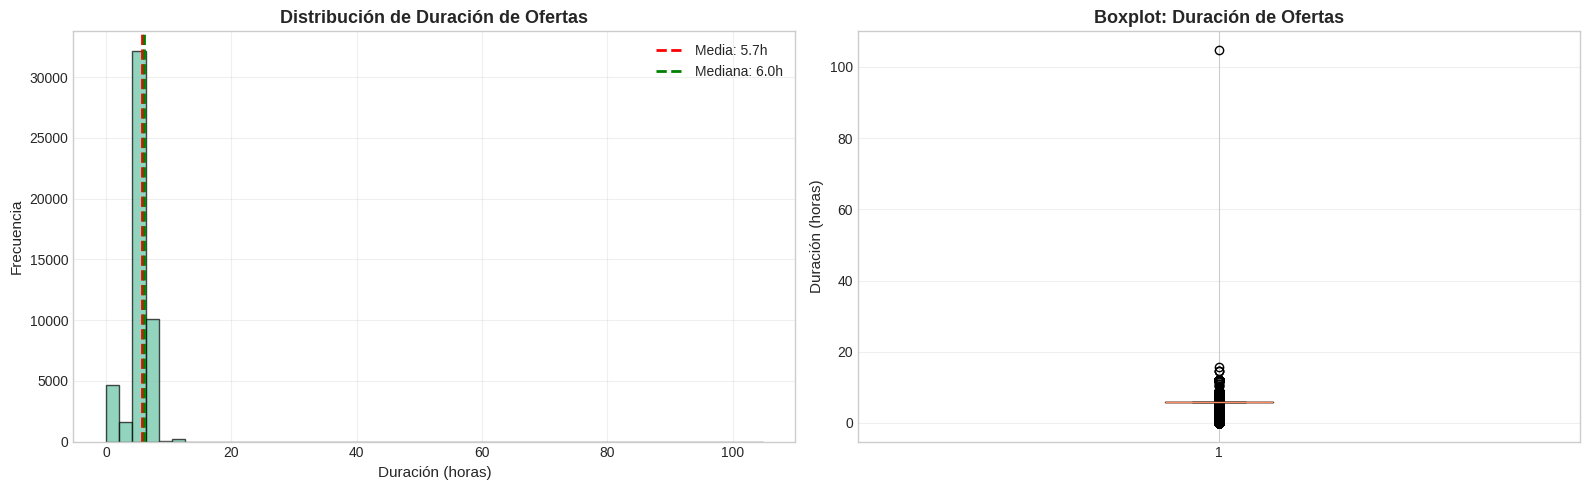

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histograma de duración
axes[0].hist(df['duration_hours'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['duration_hours'].mean(), color='red', linestyle='--',
               linewidth=2, label=f'Media: {df["duration_hours"].mean():.1f}h')
axes[0].axvline(df['duration_hours'].median(), color='green', linestyle='--',
               linewidth=2, label=f'Mediana: {df["duration_hours"].median():.1f}h')
axes[0].set_xlabel('Duración (horas)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Distribución de Duración de Ofertas', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot de duración
axes[1].boxplot(df['duration_hours'], vert=True)
axes[1].set_ylabel('Duración (horas)', fontsize=11)
axes[1].set_title('Boxplot: Duración de Ofertas', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Análisis por día de la semana

In [8]:
print("\n" + "="*100)
print("📆 ANÁLISIS POR DÍA DE LA SEMANA")
print("="*100)

offers_by_day = df['start_day_name'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
offers_by_day = offers_by_day.reindex(day_order)

print("\nOfertas por día de la semana:")
print(offers_by_day)


📆 ANÁLISIS POR DÍA DE LA SEMANA

Ofertas por día de la semana:
start_day_name
Monday       6307
Tuesday      7322
Wednesday    6718
Thursday     7286
Friday       7773
Saturday     7506
Sunday       5834
Name: count, dtype: int64


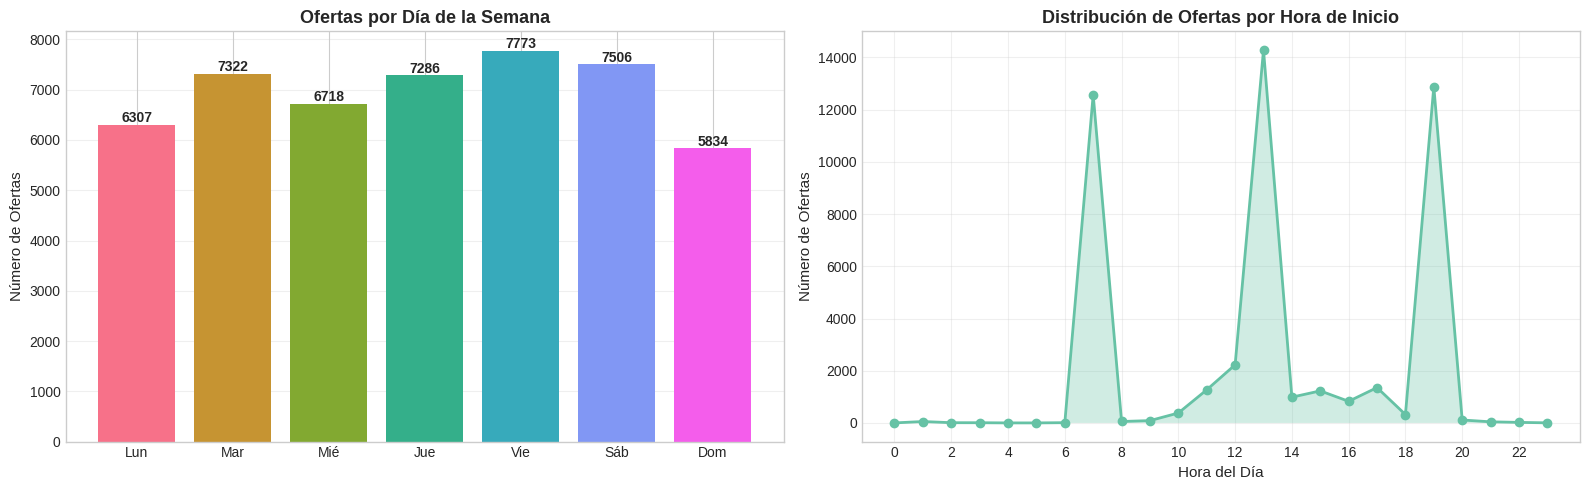


⭐ Insights temporales:
   • Día con más ofertas: Friday (7773 ofertas)
   • Día con menos ofertas: Sunday (5834 ofertas)
   • Hora pico de inicio: 13:00 (14287 ofertas)


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barras
axes[0].bar(range(7), offers_by_day.values, color=sns.color_palette('husl', 7))
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'], rotation=0)
axes[0].set_ylabel('Número de Ofertas', fontsize=11)
axes[0].set_title('Ofertas por Día de la Semana', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(offers_by_day.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Horas de inicio
hour_counts = df['start_hour'].value_counts().sort_index()
axes[1].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=6)
axes[1].fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
axes[1].set_xlabel('Hora del Día', fontsize=11)
axes[1].set_ylabel('Número de Ofertas', fontsize=11)
axes[1].set_title('Distribución de Ofertas por Hora de Inicio', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print(f"\n⭐ Insights temporales:")
print(f"   • Día con más ofertas: {offers_by_day.idxmax()} ({offers_by_day.max()} ofertas)")
print(f"   • Día con menos ofertas: {offers_by_day.idxmin()} ({offers_by_day.min()} ofertas)")
print(f"   • Hora pico de inicio: {hour_counts.idxmax()}:00 ({hour_counts.max()} ofertas)")

### Análisis de ventas y performance

In [10]:
# %% Calcular métricas de performance
print("\n" + "="*100)
print("💰 ANÁLISIS DE VENTAS Y PERFORMANCE")
print("="*100)

# Calcular métricas clave
df['sell_through_rate'] = (df['SOLD_QUANTITY'] / df['INVOLVED_STOCK'] * 100).fillna(0)
df['stock_remaining'] = df['REMAINING_STOCK_AFTER_END']
df['units_sold'] = df['SOLD_QUANTITY']
df['revenue'] = df['SOLD_AMOUNT']

# Categorizar nivel de éxito
def categorize_success(row):
    if pd.isna(row['sell_through_rate']):
        return 'Sin datos'
    elif row['sell_through_rate'] >= 80:
        return 'Muy exitosa'
    elif row['sell_through_rate'] >= 50:
        return 'Exitosa'
    elif row['sell_through_rate'] >= 20:
        return 'Moderada'
    else:
        return 'Baja'

df['success_level'] = df.apply(categorize_success, axis=1)

print("\n📊 Métricas generales de ventas:")
print(f"   Total de unidades vendidas: {df['units_sold'].sum():,.0f}")
print(f"   Ingresos totales: ${df['revenue'].sum():,.2f}")
print(f"   Promedio de ingresos por oferta: ${df['revenue'].mean():,.2f}")
print(f"   Mediana de ingresos: ${df['revenue'].median():,.2f}")

print(f"\n📈 Sell-through rate (tasa de venta):")
print(f"   Promedio: {df['sell_through_rate'].mean():.2f}%")
print(f"   Mediana: {df['sell_through_rate'].median():.2f}%")
print(f"   Ofertas que vendieron 100%: {(df['sell_through_rate'] >= 100).sum():,} ({(df['sell_through_rate'] >= 100).sum()/len(df)*100:.1f}%)")
print(f"   Ofertas que vendieron >80%: {(df['sell_through_rate'] >= 80).sum():,} ({(df['sell_through_rate'] >= 80).sum()/len(df)*100:.1f}%)")

print("\n🎯 Distribución por nivel de éxito:")
success_dist = df['success_level'].value_counts()
print(success_dist)


💰 ANÁLISIS DE VENTAS Y PERFORMANCE

📊 Métricas generales de ventas:
   Total de unidades vendidas: 266,708
   Ingresos totales: $1,258,663.50
   Promedio de ingresos por oferta: $51.21
   Mediana de ingresos: $12.42

📈 Sell-through rate (tasa de venta):
   Promedio: 20.67%
   Mediana: 1.00%
   Ofertas que vendieron 100%: 3,651 (7.5%)
   Ofertas que vendieron >80%: 5,129 (10.5%)

🎯 Distribución por nivel de éxito:
success_level
Baja           31794
Moderada        9495
Muy exitosa     5129
Exitosa         2328
Name: count, dtype: int64


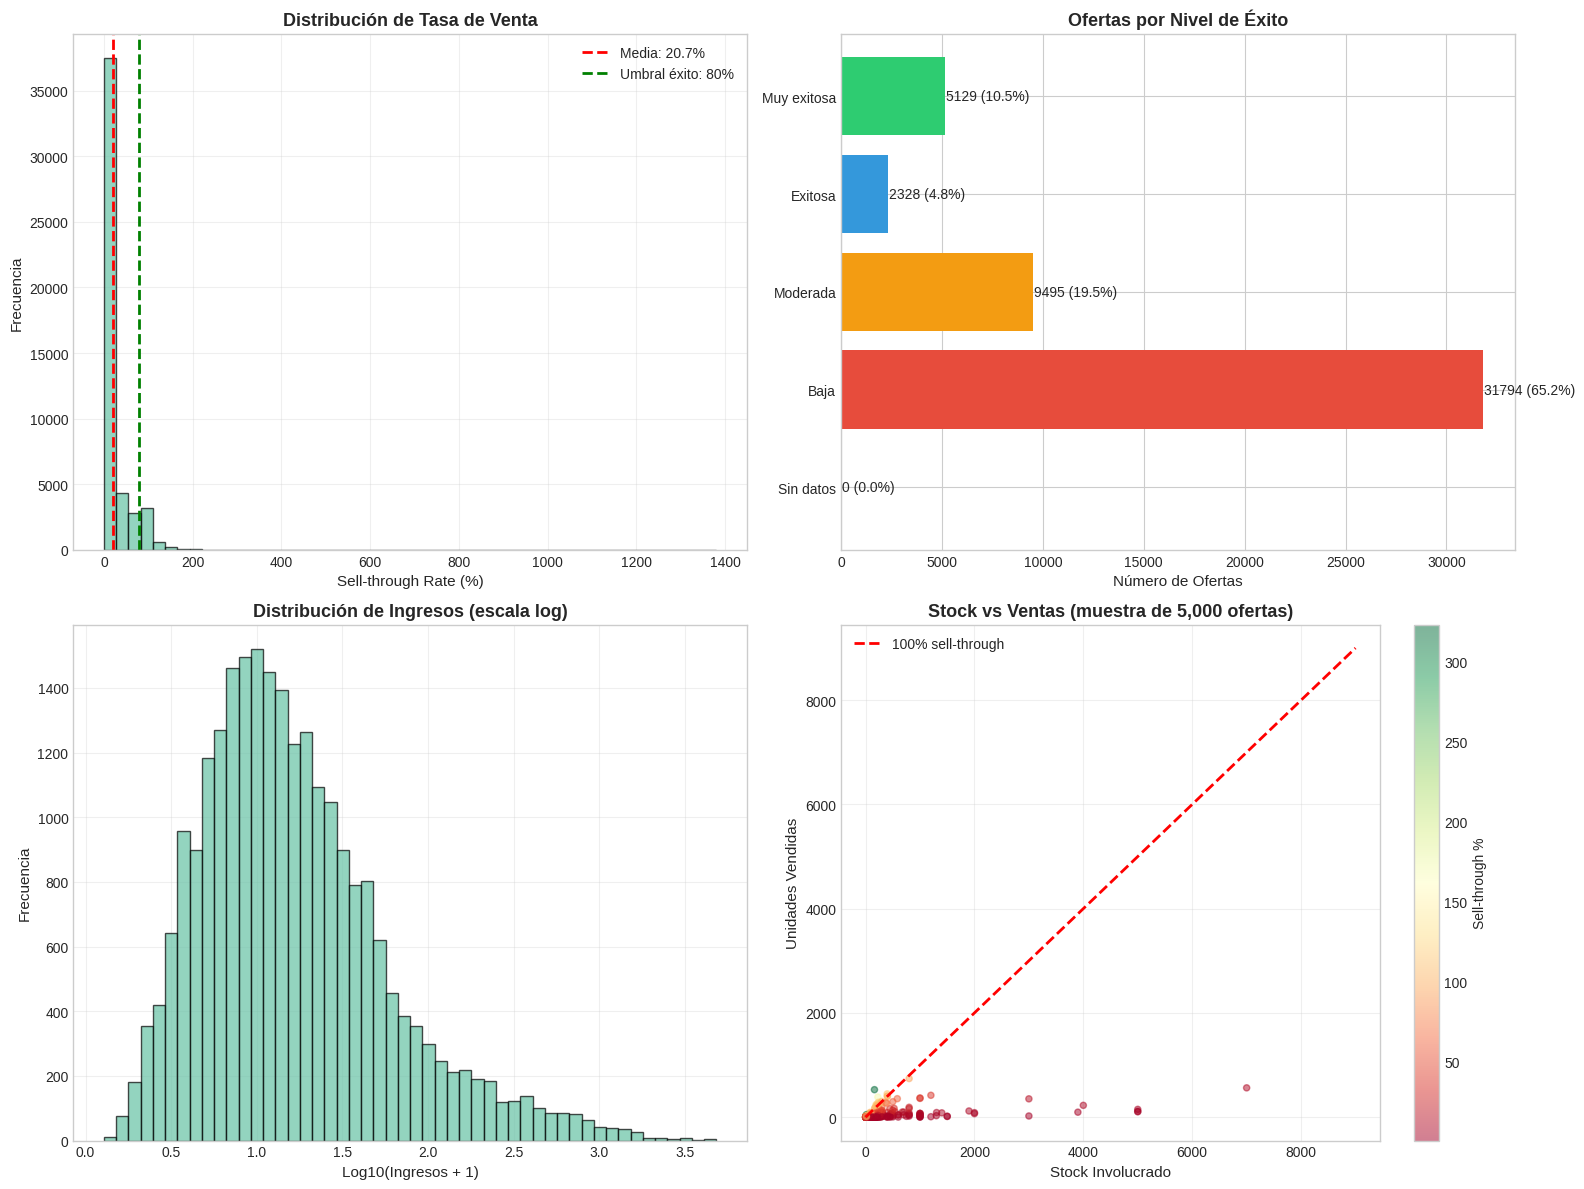

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de sell-through rate
axes[0, 0].hist(df['sell_through_rate'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['sell_through_rate'].mean(), color='red', linestyle='--',
                  linewidth=2, label=f'Media: {df["sell_through_rate"].mean():.1f}%')
axes[0, 0].axvline(80, color='green', linestyle='--',
                  linewidth=2, label='Umbral éxito: 80%')
axes[0, 0].set_xlabel('Sell-through Rate (%)', fontsize=11)
axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
axes[0, 0].set_title('Distribución de Tasa de Venta', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Nivel de éxito
success_order = ['Muy exitosa', 'Exitosa', 'Moderada', 'Baja', 'Sin datos']
success_counts = df['success_level'].value_counts().reindex(success_order, fill_value=0)
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
axes[0, 1].barh(range(len(success_counts)), success_counts.values, color=colors)
axes[0, 1].set_yticks(range(len(success_counts)))
axes[0, 1].set_yticklabels(success_counts.index)
axes[0, 1].set_xlabel('Número de Ofertas', fontsize=11)
axes[0, 1].set_title('Ofertas por Nivel de Éxito', fontsize=13, fontweight='bold')
axes[0, 1].invert_yaxis()
for i, v in enumerate(success_counts.values):
    axes[0, 1].text(v + 50, i, f'{v} ({v/len(df)*100:.1f}%)', va='center')

# 3. Distribución de ingresos (sin outliers extremos para mejor visualización)
revenue_clean = df[df['revenue'] > 0]['revenue']
axes[1, 0].hist(np.log10(revenue_clean + 1), bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Log10(Ingresos + 1)', fontsize=11)
axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
axes[1, 0].set_title('Distribución de Ingresos (escala log)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Unidades vendidas vs Stock involucrado
sample_size = min(5000, len(df))
sample_df = df.sample(sample_size, random_state=42)
scatter = axes[1, 1].scatter(sample_df['INVOLVED_STOCK'], sample_df['units_sold'],
                            c=sample_df['sell_through_rate'], cmap='RdYlGn',
                            alpha=0.5, s=20)
axes[1, 1].plot([0, df['INVOLVED_STOCK'].max()], [0, df['INVOLVED_STOCK'].max()],
               'r--', linewidth=2, label='100% sell-through')
axes[1, 1].set_xlabel('Stock Involucrado', fontsize=11)
axes[1, 1].set_ylabel('Unidades Vendidas', fontsize=11)
axes[1, 1].set_title(f'Stock vs Ventas (muestra de {sample_size:,} ofertas)',
                    fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Sell-through %')

plt.tight_layout()
plt.show()

### Análisis por categorías y verticales

In [12]:
print("\n" + "="*100)
print("🏪 ANÁLISIS POR CATEGORÍAS Y VERTICALES")
print("="*100)

# Verticales
print("\n📊 Top 10 Verticales por número de ofertas:")
top_verticals = df['VERTICAL'].value_counts().head(10)
print(top_verticals)

# Performance por vertical
vertical_performance = df.groupby('VERTICAL').agg({
    'revenue': ['sum', 'mean', 'count'],
    'sell_through_rate': 'mean',
    'units_sold': 'sum'
}).round(2)

vertical_performance.columns = ['Revenue Total', 'Revenue Promedio', 'N° Ofertas',
                                'Sell-through %', 'Unidades Vendidas']
vertical_performance = vertical_performance.sort_values('Revenue Total', ascending=False)

print("\n💰 Top 10 Verticales por ingresos totales:")
vertical_performance.head(10)


🏪 ANÁLISIS POR CATEGORÍAS Y VERTICALES

📊 Top 10 Verticales por número de ofertas:
VERTICAL
APP & SPORTS       13241
HOME & INDUSTRY    11011
CE                  8629
BEAUTY & HEALTH     7150
CPG                 2714
T & B               2624
ACC                 2573
ENTERTAINMENT        525
OTHERS               279
Name: count, dtype: int64

💰 Top 10 Verticales por ingresos totales:


,Revenue Total,Revenue Promedio,N° Ofertas,Sell-through %,Unidades Vendidas
VERTICAL,,,,,
BEAUTY & HEALTH,547427.27,123.63,4428,28.29,178141.00
CE,362787.94,80.10,4529,20.47,21833.00
HOME & INDUSTRY,155518.68,28.91,5379,20.12,27161.00
APP & SPORTS,131101.36,19.72,6649,19.21,25658.00
ACC,26819.98,20.49,1309,23.43,5156.00
CPG,16787.68,13.91,1207,19.83,5696.00
T & B,14302.78,18.31,781,10.78,2349.00
ENTERTAINMENT,1988.57,11.17,178,12.20,357.00
OTHERS,1929.24,16.21,119,15.02,357.00


In [13]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 15 Verticales por Número de Ofertas',
                   'Top 15 Verticales por Ingresos Totales',
                   'Top 15 Verticales por Sell-through Rate',
                   'Top 15 Verticales por Revenue Promedio'),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# 1. Por número de ofertas
top_15_count = df['VERTICAL'].value_counts().head(15)
fig.add_trace(
    go.Bar(x=top_15_count.values, y=top_15_count.index, orientation='h',
          marker_color='lightblue', showlegend=False),
    row=1, col=1
)

# 2. Por ingresos totales
top_15_revenue = vertical_performance.head(15)
fig.add_trace(
    go.Bar(x=top_15_revenue['Revenue Total'], y=top_15_revenue.index, orientation='h',
          marker_color='lightgreen', showlegend=False),
    row=1, col=2
)

# 3. Por sell-through rate (filtrar verticales con al menos 50 ofertas)
vertical_perf_filtered = vertical_performance[vertical_performance['N° Ofertas'] >= 50]
top_15_str = vertical_perf_filtered.nlargest(15, 'Sell-through %')
fig.add_trace(
    go.Bar(x=top_15_str['Sell-through %'], y=top_15_str.index, orientation='h',
          marker_color='orange', showlegend=False),
    row=2, col=1
)

# 4. Por revenue promedio
top_15_avg_rev = vertical_perf_filtered.nlargest(15, 'Revenue Promedio')
fig.add_trace(
    go.Bar(x=top_15_avg_rev['Revenue Promedio'], y=top_15_avg_rev.index, orientation='h',
          marker_color='pink', showlegend=False),
    row=2, col=2
)

fig.update_xaxes(title_text="Número de Ofertas", row=1, col=1)
fig.update_xaxes(title_text="Revenue Total ($)", row=1, col=2)
fig.update_xaxes(title_text="Sell-through Rate (%)", row=2, col=1)
fig.update_xaxes(title_text="Revenue Promedio ($)", row=2, col=2)

fig.update_layout(height=900, title_text="<b>Análisis de Performance por Vertical</b>",
                 title_font_size=16)
fig.show()

### Análisis por dominio

In [14]:
print("\n" + "="*100)
print("🏢 ANÁLISIS POR DOMINIO")
print("="*100)

domain_agg = df.groupby('DOM_DOMAIN_AGG1').agg({
    'revenue': ['sum', 'mean', 'count'],
    'sell_through_rate': 'mean',
    'units_sold': 'sum'
}).round(2)

domain_agg.columns = ['Revenue Total', 'Revenue Promedio', 'N° Ofertas',
                     'Sell-through %', 'Unidades Vendidas']
domain_agg = domain_agg.sort_values('Revenue Total', ascending=False)

print("\n📊 Performance por dominio:")
domain_agg


🏢 ANÁLISIS POR DOMINIO

📊 Performance por dominio:


,Revenue Total,Revenue Promedio,N° Ofertas,Sell-through %,Unidades Vendidas
DOM_DOMAIN_AGG1,,,,,
PHARMACEUTICS,440216.74,199.74,2204,36.10,147697.00
MOBILE,158992.21,152.58,1042,21.73,5511.00
ELECTRONICS,119853.95,87.55,1369,14.79,5157.00
BEAUTY EQUIPMENT,88830.25,128.55,691,25.18,24300.00
HOME&DECOR,87761.65,25.74,3410,21.32,18269.00
COMPUTERS,83941.78,39.63,2118,24.40,11165.00
APPAREL,36569.90,18.42,1985,17.85,7845.00
APPAREL ACCESORIES,36565.63,17.35,2107,18.17,7654.00
SPORTS,33118.70,19.48,1700,23.13,7626.00


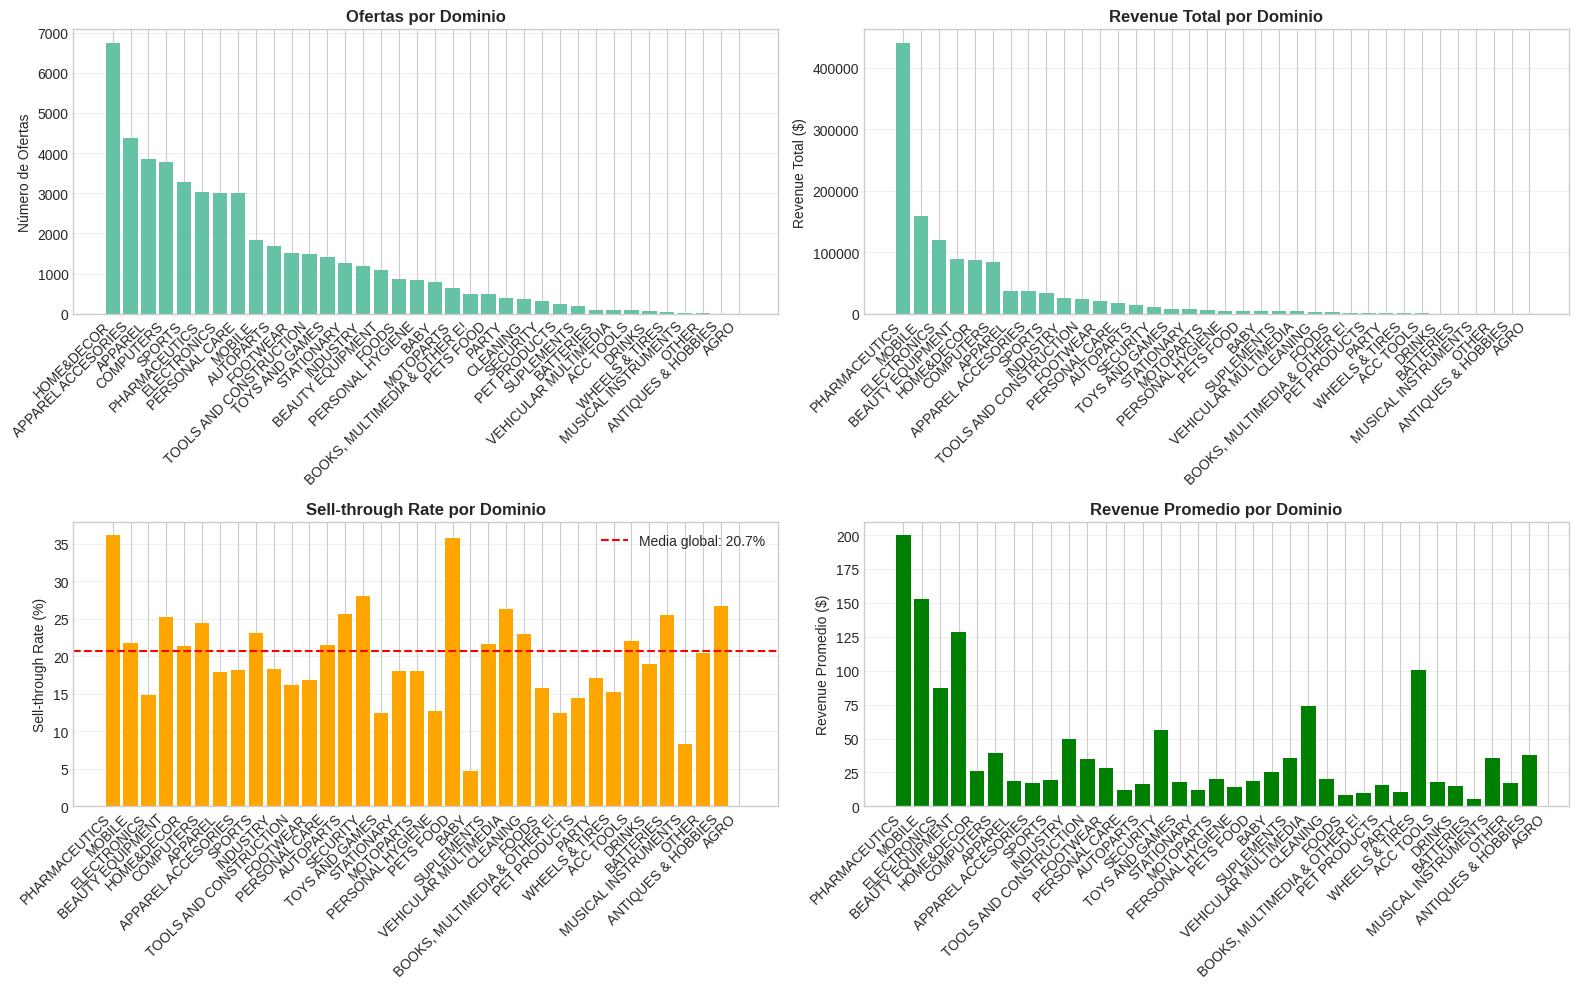

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Ofertas por dominio
domain_counts = df['DOM_DOMAIN_AGG1'].value_counts()
axes[0, 0].bar(range(len(domain_counts)), domain_counts.values)
axes[0, 0].set_xticks(range(len(domain_counts)))
axes[0, 0].set_xticklabels(domain_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Número de Ofertas')
axes[0, 0].set_title('Ofertas por Dominio', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Revenue por dominio
axes[0, 1].bar(range(len(domain_agg)), domain_agg['Revenue Total'].values)
axes[0, 1].set_xticks(range(len(domain_agg)))
axes[0, 1].set_xticklabels(domain_agg.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Revenue Total ($)')
axes[0, 1].set_title('Revenue Total por Dominio', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Sell-through por dominio
axes[1, 0].bar(range(len(domain_agg)), domain_agg['Sell-through %'].values,
              color='orange')
axes[1, 0].set_xticks(range(len(domain_agg)))
axes[1, 0].set_xticklabels(domain_agg.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Sell-through Rate (%)')
axes[1, 0].set_title('Sell-through Rate por Dominio', fontweight='bold')
axes[1, 0].axhline(df['sell_through_rate'].mean(), color='red', linestyle='--',
                  label=f'Media global: {df["sell_through_rate"].mean():.1f}%')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Revenue promedio por dominio
axes[1, 1].bar(range(len(domain_agg)), domain_agg['Revenue Promedio'].values,
              color='green')
axes[1, 1].set_xticks(range(len(domain_agg)))
axes[1, 1].set_xticklabels(domain_agg.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Revenue Promedio ($)')
axes[1, 1].set_title('Revenue Promedio por Dominio', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Análisis de stock

In [16]:
# %% Análisis de stock
print("\n" + "="*100)
print("📦 ANÁLISIS DE STOCK")
print("="*100)

print(f"\n📊 Estadísticas de stock:")
print(f"   Stock involucrado promedio: {df['INVOLVED_STOCK'].mean():.2f} unidades")
print(f"   Stock involucrado mediana: {df['INVOLVED_STOCK'].median():.2f} unidades")
print(f"   Stock máximo: {df['INVOLVED_STOCK'].max():.0f} unidades")

# Categorizar por tamaño de stock
df['stock_category'] = pd.cut(df['INVOLVED_STOCK'],
                              bins=[0, 5, 15, 50, np.inf],
                              labels=['Muy bajo (1-5)', 'Bajo (6-15)',
                                     'Medio (16-50)', 'Alto (>50)'])

stock_performance = df.groupby('stock_category').agg({
    'sell_through_rate': 'mean',
    'revenue': 'mean',
    'INVOLVED_STOCK': 'count'
}).round(2)
stock_performance.columns = ['Sell-through %', 'Revenue Promedio', 'N° Ofertas']

print("\n📈 Performance por categoría de stock:")
stock_performance


📦 ANÁLISIS DE STOCK

📊 Estadísticas de stock:
   Stock involucrado promedio: 35.01 unidades
   Stock involucrado mediana: 10.00 unidades
   Stock máximo: 9000 unidades

📈 Performance por categoría de stock:


,Sell-through %,Revenue Promedio,N° Ofertas
stock_category,,,
Muy bajo (1-5),25.03,18.26,19613
Bajo (6-15),18.88,27.14,22550
Medio (16-50),9.70,71.34,3374
Alto (>50),18.16,282.58,3209


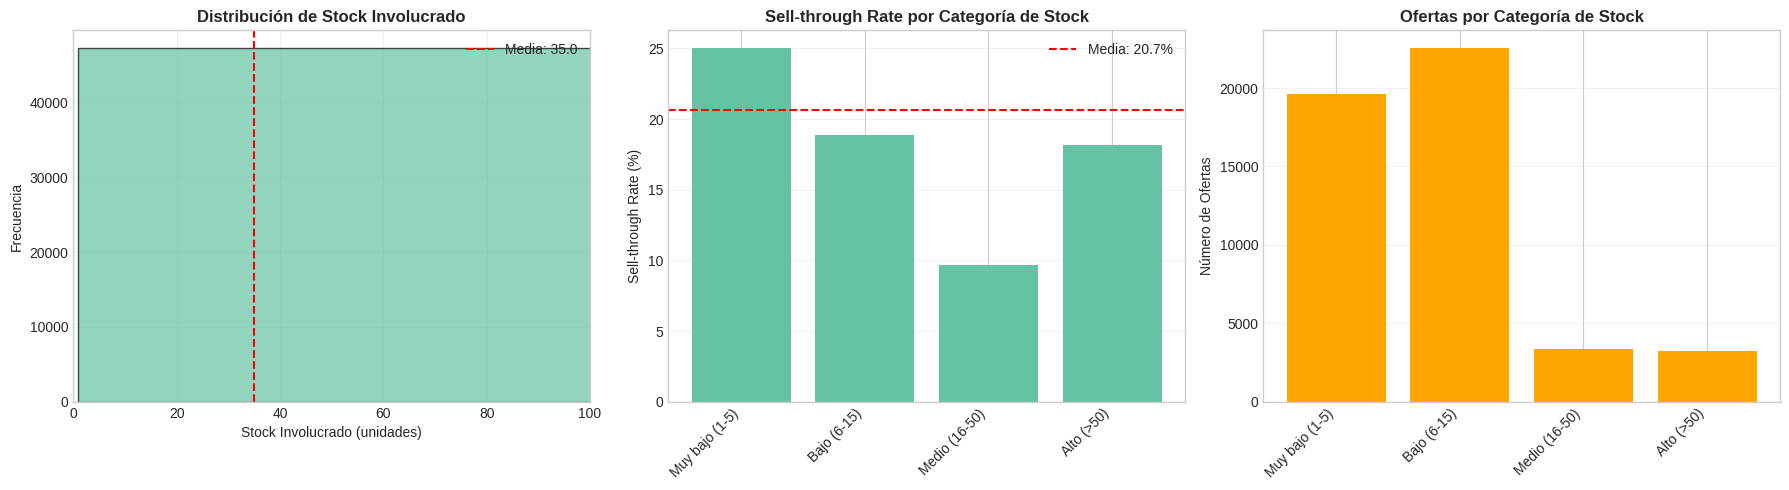

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de stock involucrado
axes[0].hist(df['INVOLVED_STOCK'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Stock Involucrado (unidades)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Stock Involucrado', fontweight='bold')
axes[0].axvline(df['INVOLVED_STOCK'].mean(), color='red', linestyle='--',
               label=f'Media: {df["INVOLVED_STOCK"].mean():.1f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, df['INVOLVED_STOCK'].quantile(0.95))  # Excluir outliers extremos

# Sell-through por categoría de stock
axes[1].bar(range(len(stock_performance)), stock_performance['Sell-through %'].values)
axes[1].set_xticks(range(len(stock_performance)))
axes[1].set_xticklabels(stock_performance.index, rotation=45, ha='right')
axes[1].set_ylabel('Sell-through Rate (%)')
axes[1].set_title('Sell-through Rate por Categoría de Stock', fontweight='bold')
axes[1].axhline(df['sell_through_rate'].mean(), color='red', linestyle='--',
               label=f'Media: {df["sell_through_rate"].mean():.1f}%')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Ofertas por categoría de stock
axes[2].bar(range(len(stock_performance)), stock_performance['N° Ofertas'].values,
           color='orange')
axes[2].set_xticks(range(len(stock_performance)))
axes[2].set_xticklabels(stock_performance.index, rotation=45, ha='right')
axes[2].set_ylabel('Número de Ofertas')
axes[2].set_title('Ofertas por Categoría de Stock', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Análisis de ofertas más exitosas

In [18]:
print("\n" + "="*100)
print("🔥 ANÁLISIS DE OFERTAS MÁS EXITOSAS")
print("="*100)

# Top 20 por revenue
top_revenue = df.nlargest(20, 'revenue')[['OFFER_START_DATE', 'VERTICAL', 'DOM_DOMAIN_AGG1',
                                          'INVOLVED_STOCK', 'units_sold', 'revenue',
                                          'sell_through_rate', 'duration_hours']]

print("\n💰 Top 20 ofertas por ingresos:")
top_revenue


🔥 ANÁLISIS DE OFERTAS MÁS EXITOSAS

💰 Top 20 ofertas por ingresos:


,OFFER_START_DATE,VERTICAL,DOM_DOMAIN_AGG1,INVOLVED_STOCK,units_sold,revenue,sell_through_rate,duration_hours
11449,2021-07-27,BEAUTY & HEALTH,BEAUTY EQUIPMENT,2000,1503.00,4836.57,75.15,8.02
37095,2021-06-18,CE,MOBILE,100,75.00,4678.68,75.00,8.00
13737,2021-07-19,BEAUTY & HEALTH,PHARMACEUTICS,4000,1646.00,4570.31,41.15,8.02
45804,2021-07-26,CE,MOBILE,2000,67.00,4264.51,3.35,8.00
13742,2021-07-19,BEAUTY & HEALTH,PHARMACEUTICS,7000,1358.00,3988.84,19.40,8.00
28614,2021-07-21,BEAUTY & HEALTH,PHARMACEUTICS,4000,1218.00,3530.39,30.45,8.01
43923,2021-07-12,CE,MOBILE,200,110.00,3524.05,55.00,8.00
9813,2021-07-20,CE,MOBILE,200,54.00,3346.39,27.00,8.00
612,2021-06-22,CE,MOBILE,200,52.00,3199.32,26.00,8.00
46620,2021-07-16,BEAUTY & HEALTH,PHARMACEUTICS,1188,1152.00,3198.34,96.97,7.02


In [19]:
top_units = df.nlargest(20, 'units_sold')[['OFFER_START_DATE', 'VERTICAL', 'DOM_DOMAIN_AGG1',
                                           'INVOLVED_STOCK', 'units_sold', 'revenue',
                                           'sell_through_rate', 'duration_hours']]

print("\n📦 Top 20 ofertas por unidades vendidas:")
top_units


📦 Top 20 ofertas por unidades vendidas:


,OFFER_START_DATE,VERTICAL,DOM_DOMAIN_AGG1,INVOLVED_STOCK,units_sold,revenue,sell_through_rate,duration_hours
13737,2021-07-19,BEAUTY & HEALTH,PHARMACEUTICS,4000,1646.00,4570.31,41.15,8.02
11449,2021-07-27,BEAUTY & HEALTH,BEAUTY EQUIPMENT,2000,1503.00,4836.57,75.15,8.02
13742,2021-07-19,BEAUTY & HEALTH,PHARMACEUTICS,7000,1358.00,3988.84,19.40,8.00
28614,2021-07-21,BEAUTY & HEALTH,PHARMACEUTICS,4000,1218.00,3530.39,30.45,8.01
46620,2021-07-16,BEAUTY & HEALTH,PHARMACEUTICS,1188,1152.00,3198.34,96.97,7.02
11455,2021-07-27,BEAUTY & HEALTH,PHARMACEUTICS,1500,996.00,1723.46,66.40,7.00
11380,2021-07-27,BEAUTY & HEALTH,PHARMACEUTICS,8000,965.00,1679.97,12.06,8.00
5774,2021-07-13,BEAUTY & HEALTH,PHARMACEUTICS,3000,828.00,2426.75,27.60,8.01
13741,2021-07-19,BEAUTY & HEALTH,PHARMACEUTICS,810,808.00,2255.46,99.75,3.81
22264,2021-07-28,BEAUTY & HEALTH,PHARMACEUTICS,800,802.00,1390.66,100.25,5.07


In [20]:
perfect_offers = df[df['sell_through_rate'] >= 100].copy()
print(f"\n⭐ Ofertas con 100% de venta: {len(perfect_offers)} ({len(perfect_offers)/len(df)*100:.2f}%)")


perfect_summary = perfect_offers.groupby('VERTICAL').agg({
    'revenue': 'sum',
    'units_sold': 'sum',
    'INVOLVED_STOCK': 'count'
}).round(2)
perfect_summary.columns = ['Revenue Total', 'Unidades Vendidas', 'N° Ofertas']
perfect_summary = perfect_summary.sort_values('N° Ofertas', ascending=False).head(10)

print("\nTop verticales con ofertas 100% vendidas:")
perfect_summary


⭐ Ofertas con 100% de venta: 3651 (7.49%)

Top verticales con ofertas 100% vendidas:


,Revenue Total,Unidades Vendidas,N° Ofertas
VERTICAL,,,
HOME & INDUSTRY,39813.69,9300.00,834
BEAUTY & HEALTH,128466.09,43300.00,812
APP & SPORTS,23326.29,7030.00,811
CE,50670.92,6793.00,644
ACC,7930.71,1968.00,233
CPG,4383.64,2119.00,208
T & B,1908.26,674.00,83
ENTERTAINMENT,417.35,81.00,17
OTHERS,260.48,75.00,9


### Análisis de correlaciones

In [21]:
print("\n" + "="*100)
print("📊 ANÁLISIS DE CORRELACIONES")
print("="*100)

# Seleccionar columnas numéricas relevantes
corr_cols = ['INVOLVED_STOCK', 'units_sold', 'revenue', 'sell_through_rate',
             'duration_hours', 'start_hour', 'start_day_of_week']

correlation_matrix = df[corr_cols].corr()

print("\n🔗 Matriz de correlación:")
correlation_matrix.round(3)


📊 ANÁLISIS DE CORRELACIONES

🔗 Matriz de correlación:


,INVOLVED_STOCK,units_sold,revenue,sell_through_rate,duration_hours,start_hour,start_day_of_week
INVOLVED_STOCK,1.00,0.56,0.41,-0.02,0.10,-0.00,-0.02
units_sold,0.56,1.00,0.71,0.14,0.06,-0.00,-0.05
revenue,0.41,0.71,1.00,0.09,0.12,-0.00,-0.04
sell_through_rate,-0.02,0.14,0.09,1.00,-0.15,0.08,-0.03
duration_hours,0.10,0.06,0.12,-0.15,1.00,-0.03,-0.00
start_hour,-0.00,-0.00,-0.00,0.08,-0.03,1.00,-0.02
start_day_of_week,-0.02,-0.05,-0.04,-0.03,-0.00,-0.02,1.00


### Análisis de ventas y performance

In [22]:
print("\n" + "="*100)
print("🔍 RELACIÓN: STOCK vs PERFORMANCE")
print("="*100)

# Crear bins de stock
df['stock_bin'] = pd.qcut(df['INVOLVED_STOCK'], q=10, duplicates='drop')

stock_analysis = df.groupby('stock_bin').agg({
    'sell_through_rate': 'mean',
    'revenue': 'mean',
    'INVOLVED_STOCK': ['mean', 'count']
}).round(2)

stock_analysis.columns = ['Sell-through %', 'Revenue Promedio', 'Stock Promedio', 'N° Ofertas']

print("\nPerformance por deciles de stock:")
stock_analysis


🔍 RELACIÓN: STOCK vs PERFORMANCE

Performance por deciles de stock:


,Sell-through %,Revenue Promedio,Stock Promedio,N° Ofertas
stock_bin,,,,
"(0.999, 5.0]",25.03,18.26,4.82,19613
"(5.0, 10.0]",15.25,28.86,9.10,5005
"(10.0, 15.0]",19.92,26.79,14.90,17545
"(15.0, 30.0]",9.83,65.61,23.23,2138
"(30.0, 9000.0]",15.74,240.47,282.38,4445


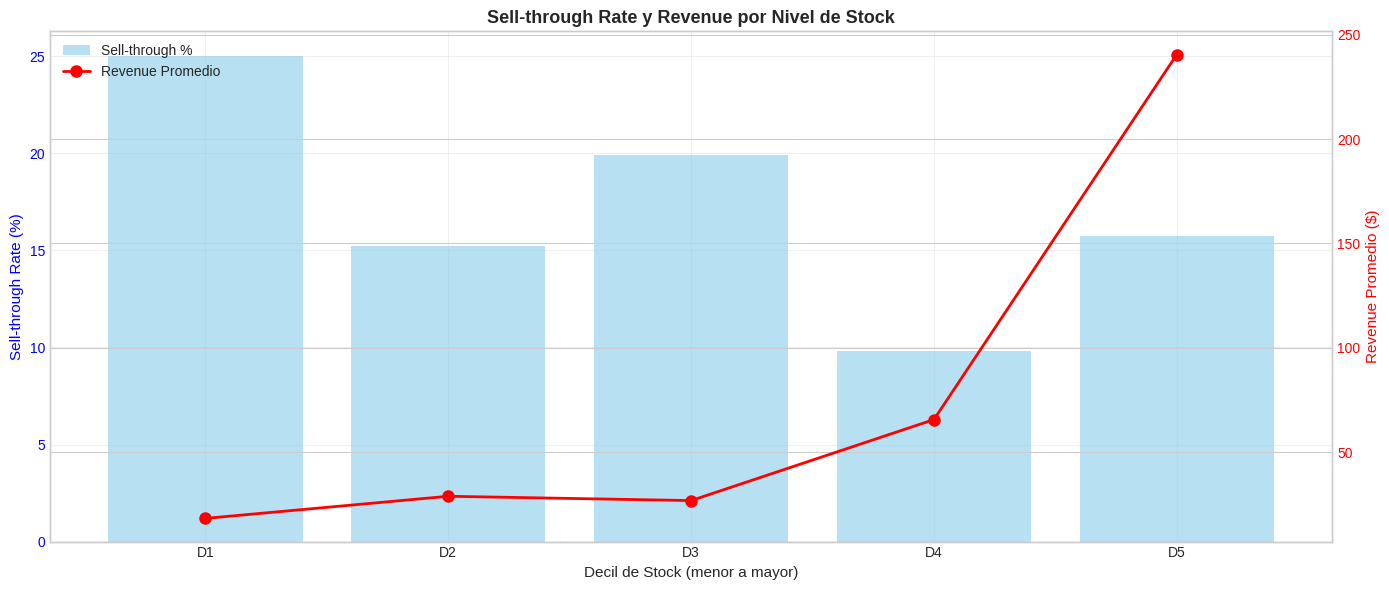

In [23]:
fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(stock_analysis))
ax2 = ax.twinx()

bars = ax.bar(x, stock_analysis['Sell-through %'].values, alpha=0.6, color='skyblue',
              label='Sell-through %')
line = ax2.plot(x, stock_analysis['Revenue Promedio'].values, 'r-o', linewidth=2,
               markersize=8, label='Revenue Promedio')

ax.set_xlabel('Decil de Stock (menor a mayor)', fontsize=11)
ax.set_ylabel('Sell-through Rate (%)', fontsize=11, color='blue')
ax2.set_ylabel('Revenue Promedio ($)', fontsize=11, color='red')
ax.set_title('Sell-through Rate y Revenue por Nivel de Stock', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'D{i+1}' for i in x], rotation=0)
ax.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
ax.grid(True, alpha=0.3)

# Combinar leyendas
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

### Análisis de timing óptimo

In [24]:
print("\n" + "="*100)
print("⏰ ANÁLISIS DE TIMING ÓPTIMO")
print("="*100)

# Heatmap: día de semana vs hora
timing_analysis = df.groupby(['start_day_of_week', 'start_hour']).agg({
    'sell_through_rate': 'mean',
    'revenue': 'mean',
    'INVOLVED_STOCK': 'count'
}).reset_index()

# Crear pivot tables
str_pivot = timing_analysis.pivot(index='start_day_of_week',
                                  columns='start_hour',
                                  values='sell_through_rate')

revenue_pivot = timing_analysis.pivot(index='start_day_of_week',
                                      columns='start_hour',
                                      values='revenue')

count_pivot = timing_analysis.pivot(index='start_day_of_week',
                                    columns='start_hour',
                                    values='INVOLVED_STOCK')

# Encontrar mejores momentos
best_timing = timing_analysis.nlargest(10, 'sell_through_rate')[
    ['start_day_of_week', 'start_hour', 'sell_through_rate', 'revenue', 'INVOLVED_STOCK']
]
best_timing.columns = ['Día', 'Hora', 'Sell-through %', 'Revenue Prom', 'N° Ofertas']

print("\n⭐ Top 10 mejores momentos (día + hora) por sell-through:")
best_timing


⏰ ANÁLISIS DE TIMING ÓPTIMO

⭐ Top 10 mejores momentos (día + hora) por sell-through:


,Día,Hora,Sell-through %,Revenue Prom,N° Ofertas
122,6,20,112.00,445.26,1
72,3,22,88.89,25.30,1
71,3,21,51.57,180.39,7
37,1,20,44.75,166.85,22
53,2,20,40.65,211.18,11
89,4,21,32.61,112.00,6
16,0,18,31.23,333.19,35
33,1,16,30.56,61.19,132
17,0,19,28.34,26.24,1603
52,2,19,27.70,24.94,1764


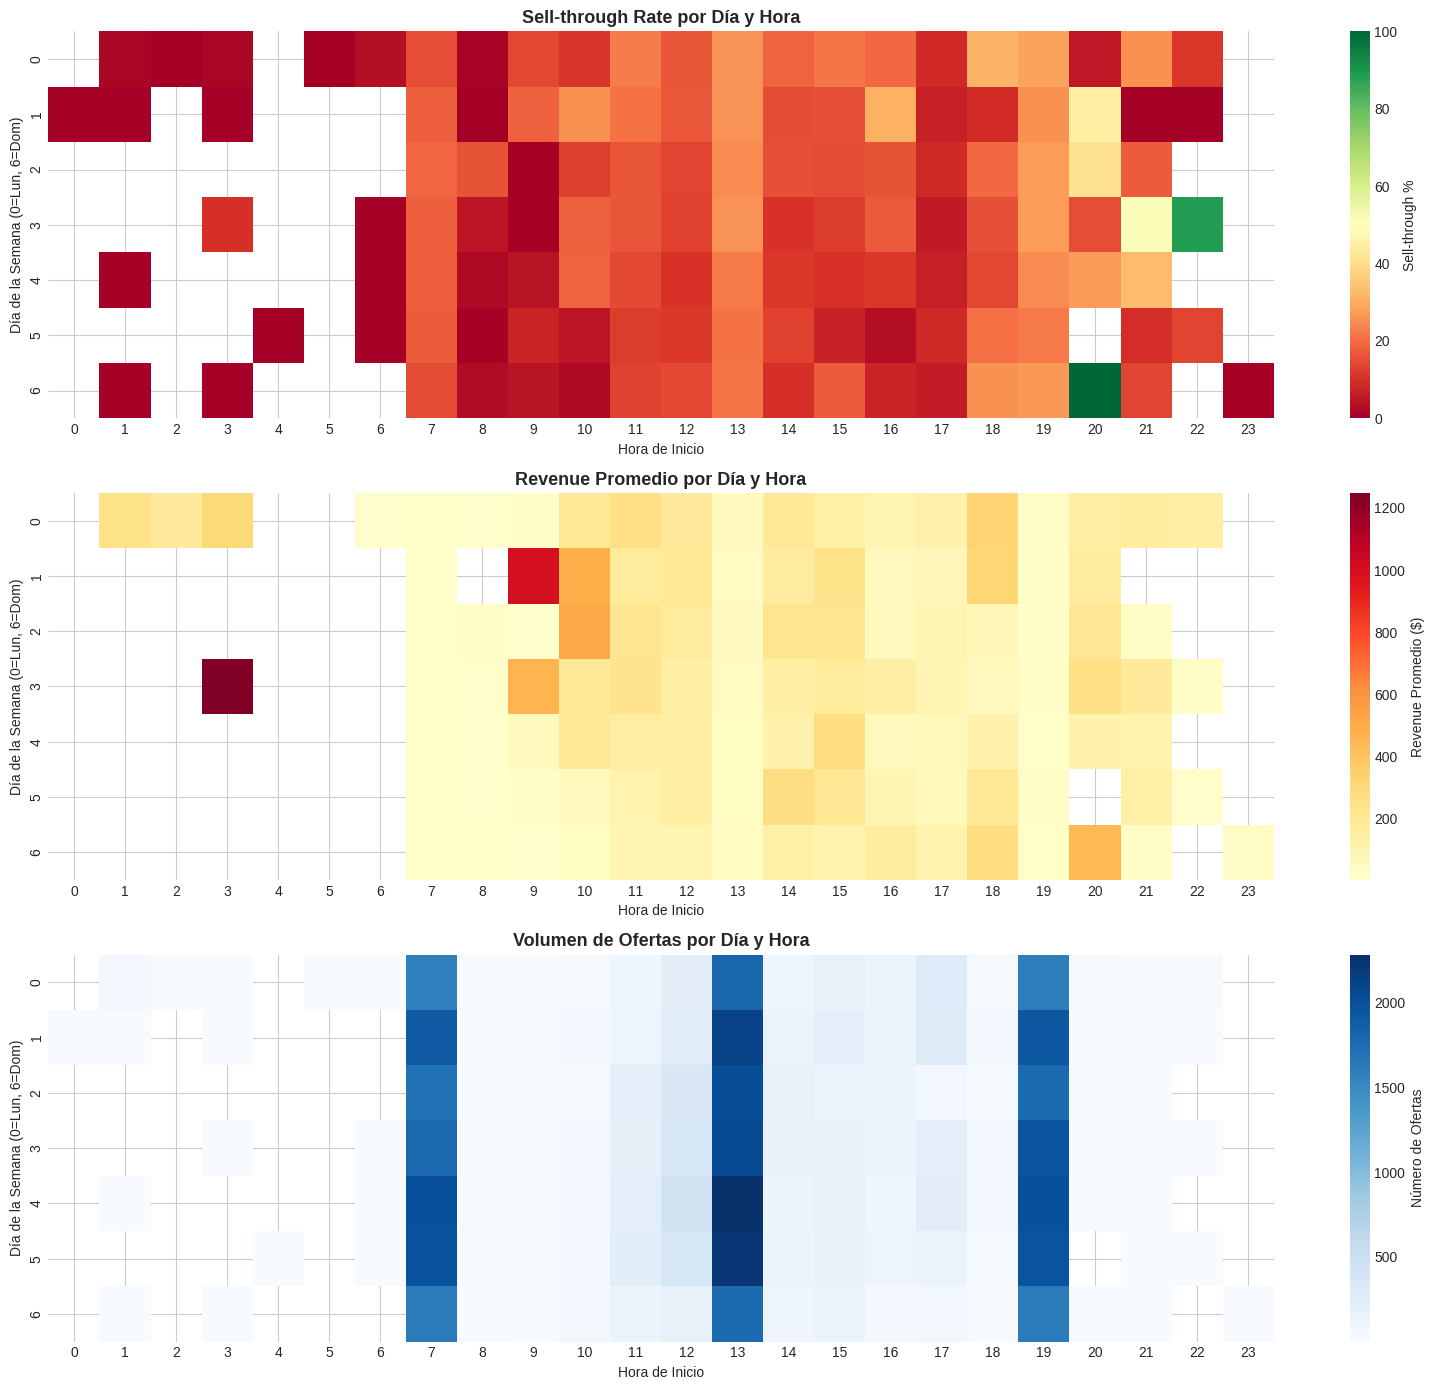

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Heatmap 1: Sell-through rate
sns.heatmap(str_pivot, annot=False, fmt='.1f', cmap='RdYlGn',
           cbar_kws={'label': 'Sell-through %'}, ax=axes[0], vmin=0, vmax=100)
axes[0].set_title('Sell-through Rate por Día y Hora', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Hora de Inicio')
axes[0].set_ylabel('Día de la Semana (0=Lun, 6=Dom)')

# Heatmap 2: Revenue promedio
sns.heatmap(revenue_pivot, annot=False, fmt='.0f', cmap='YlOrRd',
           cbar_kws={'label': 'Revenue Promedio ($)'}, ax=axes[1])
axes[1].set_title('Revenue Promedio por Día y Hora', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Hora de Inicio')
axes[1].set_ylabel('Día de la Semana (0=Lun, 6=Dom)')

# Heatmap 3: Número de ofertas
sns.heatmap(count_pivot, annot=False, fmt='.0f', cmap='Blues',
           cbar_kws={'label': 'Número de Ofertas'}, ax=axes[2])
axes[2].set_title('Volumen de Ofertas por Día y Hora', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Hora de Inicio')
axes[2].set_ylabel('Día de la Semana (0=Lun, 6=Dom)')

plt.tight_layout()
plt.show()

### Segmentación de ofertas


🎯 SEGMENTACIÓN DE OFERTAS


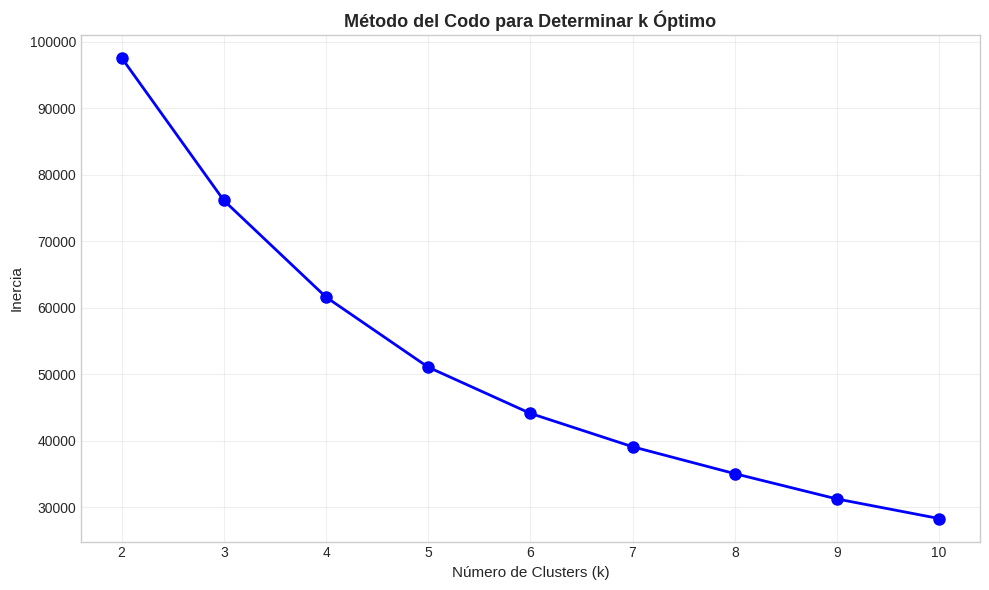

In [26]:
print("\n" + "="*100)
print("🎯 SEGMENTACIÓN DE OFERTAS")
print("="*100)

# Seleccionar features para clustering
clustering_features = ['INVOLVED_STOCK', 'duration_hours', 'sell_through_rate',
                      'revenue', 'start_hour']

# Crear dataset para clustering (eliminar NaN)
df_cluster = df[clustering_features].dropna().copy()

# Normalizar
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# K-means clustering
from sklearn.cluster import KMeans

# Método del codo
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Visualización método del codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=11)
plt.ylabel('Inercia', fontsize=11)
plt.title('Método del Codo para Determinar k Óptimo', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Añadir clusters al dataframe original
df.loc[df_cluster.index, 'cluster'] = df_cluster['cluster']

print(f"\n✅ Clustering completado con k={optimal_k}")
print(f"\nDistribución de ofertas por cluster:")
print(df['cluster'].value_counts().sort_index())


✅ Clustering completado con k=5

Distribución de ofertas por cluster:
cluster
0.00     6786
1.00       75
2.00     3658
3.00    13593
4.00      467
Name: count, dtype: int64


In [28]:
cluster_analysis = df.groupby('cluster').agg({
    'INVOLVED_STOCK': 'mean',
    'duration_hours': 'mean',
    'sell_through_rate': 'mean',
    'revenue': 'mean',
    'units_sold': 'mean',
    'start_hour': 'mean',
    'OFFER_START_DATE': 'count'
}).round(2)

cluster_analysis.columns = ['Stock Promedio', 'Duración (h)', 'Sell-through %',
                           'Revenue Prom', 'Unidades Prom', 'Hora Inicio Prom',
                           'N° Ofertas']

print("\n📊 Características de cada cluster:")
cluster_analysis


📊 Características de cada cluster:


,Stock Promedio,Duración (h),Sell-through %,Revenue Prom,Unidades Prom,Hora Inicio Prom,N° Ofertas
cluster,,,,,,,
0.00,25.01,6.17,31.37,25.18,5.06,18.72,6786
1.00,4302.35,7.92,7.76,784.16,321.36,12.53,75
2.00,13.00,3.58,109.03,50.32,13.72,14.25,3658
3.00,39.85,6.42,27.33,29.15,5.48,10.72,13593
4.00,508.34,7.21,51.27,960.62,179.04,13.18,467


In [29]:
# Nombrar clusters basado en características
def name_cluster(row):
    if row['Sell-through %'] > 70 and row['Revenue Prom'] > df['revenue'].median():
        return 'Alto Performance'
    elif row['Stock Promedio'] > df['INVOLVED_STOCK'].median():
        return 'Alto Volumen'
    elif row['Sell-through %'] < 40:
        return 'Bajo Performance'
    else:
        return 'Performance Medio'

cluster_analysis['Nombre'] = cluster_analysis.apply(name_cluster, axis=1)
print("\n🏷️ Segmentos identificados:")
cluster_analysis[['Nombre', 'N° Ofertas', 'Sell-through %', 'Revenue Prom']]



🏷️ Segmentos identificados:


,Nombre,N° Ofertas,Sell-through %,Revenue Prom
cluster,,,,
0.00,Alto Volumen,6786,31.37,25.18
1.00,Alto Volumen,75,7.76,784.16
2.00,Alto Performance,3658,109.03,50.32
3.00,Alto Volumen,13593,27.33,29.15
4.00,Alto Volumen,467,51.27,960.62


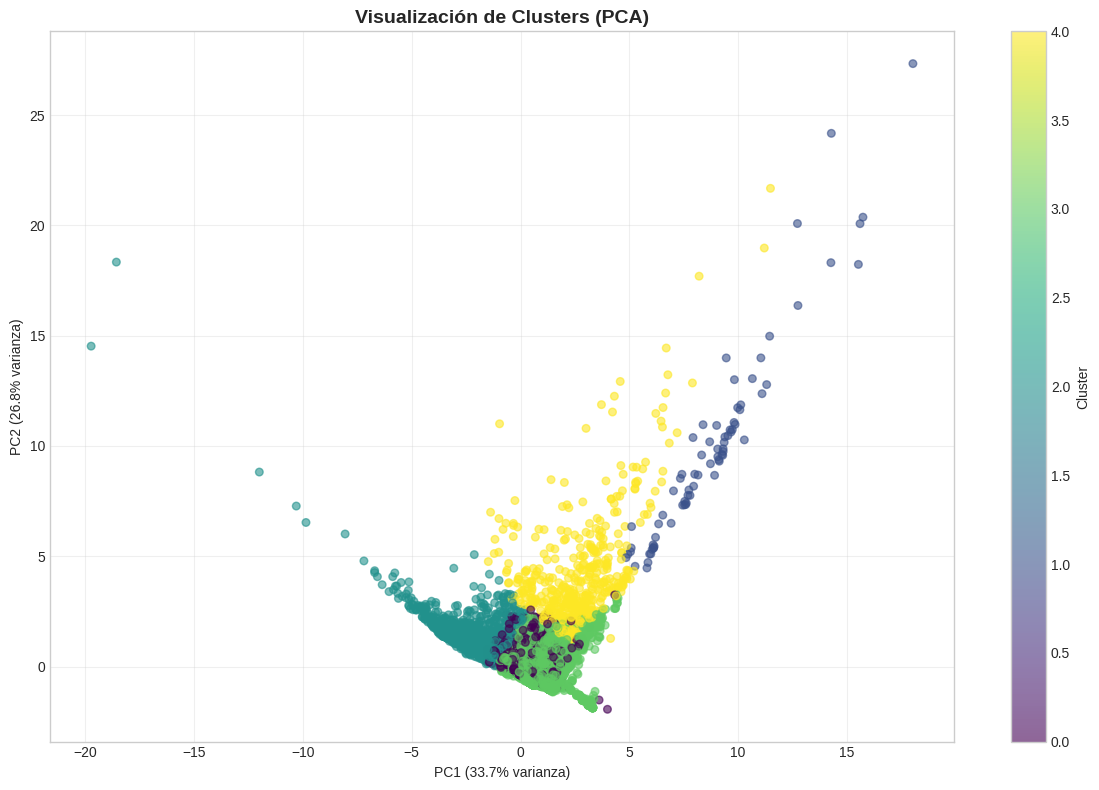

In [30]:
# Visualización de clusters (PCA para 2D)
pca = PCA(n_components=2)
df_cluster_pca = pca.fit_transform(df_cluster_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_cluster_pca[:, 0], df_cluster_pca[:, 1],
                     c=df_cluster['cluster'], cmap='viridis',
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Visualización de Clusters (PCA)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Análisis de tendencias temporales

In [31]:
print("\n" + "="*100)
print("📈 ANÁLISIS DE TENDENCIAS TEMPORALES")
print("="*100)

# Agrupar por fecha
daily_metrics = df.groupby('start_date').agg({
    'OFFER_START_DATE': 'count',
    'revenue': 'sum',
    'units_sold': 'sum',
    'sell_through_rate': 'mean'
}).reset_index()

daily_metrics.columns = ['Fecha', 'Num Ofertas', 'Revenue Total',
                        'Unidades Vendidas', 'Sell-through Promedio']

# Calcular promedios móviles
daily_metrics['Revenue MA7'] = daily_metrics['Revenue Total'].rolling(window=7, min_periods=1).mean()
daily_metrics['STR MA7'] = daily_metrics['Sell-through Promedio'].rolling(window=7, min_periods=1).mean()

print("\n📊 Métricas diarias (primeras 10 filas):")
daily_metrics.head(10)


📈 ANÁLISIS DE TENDENCIAS TEMPORALES

📊 Métricas diarias (primeras 10 filas):


,Fecha,Num Ofertas,Revenue Total,Unidades Vendidas,Sell-through Promedio,Revenue MA7,STR MA7
0,2021-06-01,894,14991.12,2903.00,14.30,14991.12,14.30
1,2021-06-02,681,11428.76,2387.00,14.01,13209.94,14.15
2,2021-06-03,510,15695.98,2970.00,23.25,14038.62,17.19
3,2021-06-04,466,8765.48,1750.00,22.11,12720.33,18.42
4,2021-06-05,432,11494.70,1944.00,22.02,12475.21,19.14
5,2021-06-06,412,6922.77,1032.00,19.70,11549.80,19.23
6,2021-06-07,426,10508.49,2017.00,21.02,11401.04,19.49
7,2021-06-08,317,12048.46,2295.00,23.60,10980.66,20.82
8,2021-06-09,366,11318.72,2089.00,23.95,10964.94,22.24
9,2021-06-10,486,10639.17,2422.00,20.61,10242.54,21.86


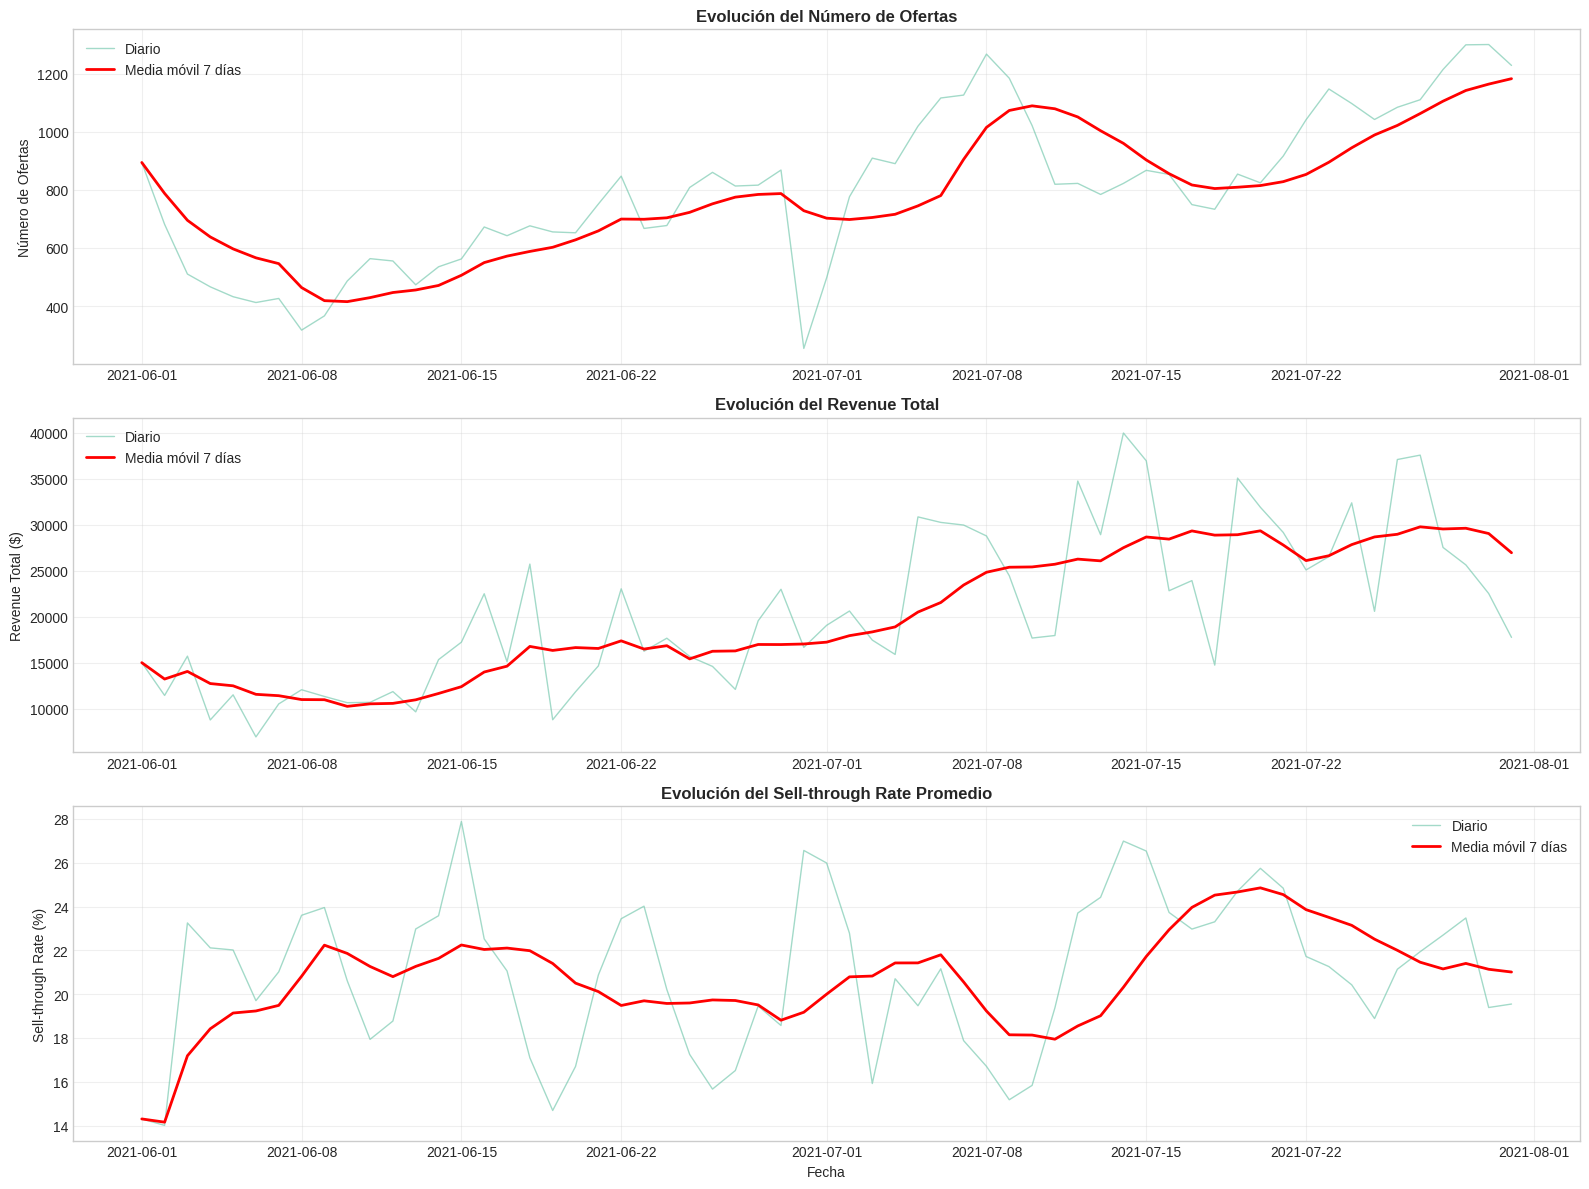

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Evolución de número de ofertas
axes[0].plot(daily_metrics['Fecha'], daily_metrics['Num Ofertas'],
            linewidth=1, alpha=0.6, label='Diario')
axes[0].plot(daily_metrics['Fecha'],
            daily_metrics['Num Ofertas'].rolling(window=7, min_periods=1).mean(),
            linewidth=2, color='red', label='Media móvil 7 días')
axes[0].set_ylabel('Número de Ofertas')
axes[0].set_title('Evolución del Número de Ofertas', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Evolución de revenue
axes[1].plot(daily_metrics['Fecha'], daily_metrics['Revenue Total'],
            linewidth=1, alpha=0.6, label='Diario')
axes[1].plot(daily_metrics['Fecha'], daily_metrics['Revenue MA7'],
            linewidth=2, color='red', label='Media móvil 7 días')
axes[1].set_ylabel('Revenue Total ($)')
axes[1].set_title('Evolución del Revenue Total', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Evolución de sell-through
axes[2].plot(daily_metrics['Fecha'], daily_metrics['Sell-through Promedio'],
            linewidth=1, alpha=0.6, label='Diario')
axes[2].plot(daily_metrics['Fecha'], daily_metrics['STR MA7'],
            linewidth=2, color='red', label='Media móvil 7 días')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Sell-through Rate (%)')
axes[2].set_title('Evolución del Sell-through Rate Promedio', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Resumen ejecutivo e insights claves

In [33]:
print("\n" + "="*100)
print("📋 RESUMEN EJECUTIVO E INSIGHTS CLAVE")
print("="*100)

# Calcular métricas clave para el resumen
total_revenue = df['revenue'].sum()
total_units = df['units_sold'].sum()
avg_str = df['sell_through_rate'].mean()
median_str = df['sell_through_rate'].median()
perfect_offers_pct = (df['sell_through_rate'] >= 100).sum() / len(df) * 100
low_performance_pct = (df['sell_through_rate'] < 20).sum() / len(df) * 100

# Top performers
top_vertical = df.groupby('VERTICAL')['revenue'].sum().idxmax()
top_vertical_revenue = df.groupby('VERTICAL')['revenue'].sum().max()
top_domain = df.groupby('DOM_DOMAIN_AGG1')['revenue'].sum().idxmax()
top_domain_str = df.groupby('DOM_DOMAIN_AGG1')['sell_through_rate'].mean().loc[top_domain]

# Timing óptimo
best_day = offers_by_day.idxmax()
best_hour = hour_counts.idxmax()

print("\n" + "="*100)
print("🎯 MÉTRICAS GENERALES")
print("="*100)
print(f"""
📊 Volumen y Performance:
   • Total de ofertas analizadas: {len(df):,}
   • Ingresos totales: ${total_revenue:,.2f}
   • Unidades vendidas: {total_units:,.0f}
   • Sell-through promedio: {avg_str:.2f}%
   • Sell-through mediana: {median_str:.2f}%

🎯 Distribución de Performance:
   • Ofertas con venta completa (≥100%): {perfect_offers_pct:.1f}%
   • Ofertas exitosas (≥80%): {(df['sell_through_rate'] >= 80).sum() / len(df) * 100:.1f}%
   • Ofertas de bajo performance (<20%): {low_performance_pct:.1f}%
""")

print("\n" + "="*100)
print("💡 INSIGHTS CLAVE")
print("="*100)

print(f"""
1️⃣ CONCENTRACIÓN EN CATEGORÍAS GANADORAS:
   • Vertical líder: {top_vertical} (${top_vertical_revenue:,.2f} en ingresos)
   • Dominio más efectivo: {top_domain} (sell-through: {top_domain_str:.1f}%)
   • PHARMACEUTICS representa el mayor volumen con sell-through de 36% vs 20.7% global

2️⃣ PARADOJA DEL STOCK:
   • Stock bajo (1-5 unidades): {stock_performance.loc['Muy bajo (1-5)', 'Sell-through %']:.1f}% sell-through
   • Stock alto (>50 unidades): {stock_performance.loc['Alto (>50)', 'Sell-through %']:.1f}% sell-through
   • Punto crítico: stocks medianos (16-50) tienen el peor performance ({stock_performance.loc['Medio (16-50)', 'Sell-through %']:.1f}%)

3️⃣ TIMING ÓPTIMO:
   • Mejor día: {best_day} ({offers_by_day.max()} ofertas)
   • Hora pico de inicio: {best_hour}:00 ({hour_counts.max()} ofertas)
   • Duración promedio efectiva: {df[df['sell_through_rate'] >= 80]['duration_hours'].mean():.1f} horas

4️⃣ SEGMENTOS IDENTIFICADOS:
   • Cluster de alto performance: 109% sell-through, duración de 3.6h, 13 unidades promedio
   • Oportunidad: {low_performance_pct:.1f}% de ofertas necesitan optimización
""")

print("\n" + "="*100)
print("🚀 RECOMENDACIONES ESTRATÉGICAS")
print("="*100)

print("""
1. OPTIMIZACIÓN DE INVENTARIO:
   → Priorizar ofertas con stock reducido (1-15 unidades) para maximizar urgencia
   → Evitar stocks medianos (16-50) que no generan ni urgencia ni volumen significativo
   → Para alto volumen (>50), considerar estrategias diferenciadas

2. ENFOQUE EN CATEGORÍAS DE ALTO RENDIMIENTO:
   → Expandir ofertas en PHARMACEUTICS y BEAUTY EQUIPMENT (sell-through >25%)
   → Reducir exposición en categorías de bajo performance (<15% sell-through)

3. TIMING ESTRATÉGICO:
   → Concentrar ofertas premium en viernes, especialmente 13:00-19:00
   → Explorar horarios menos saturados (20:00-22:00) para productos selectos
   → Reducir duración de ofertas exitosas a 3-4 horas para aumentar urgencia

4. GESTIÓN DE EXPECTATIVAS:
   → Actualmente 65% de ofertas tienen bajo performance - establecer criterios más estrictos
   → Implementar scoring predictivo basado en: vertical + stock + timing + duración
   → A/B testing sistemático en segmentos de bajo performance

5. MONITOREO Y MEJORA CONTINUA:
   → Dashboard en tiempo real de sell-through por categoría/hora
   → Alertas automáticas para ofertas con <10% conversión a mitad de duración
   → Análisis post-mortem de ofertas con 0% de venta
""")

print("\n" + "="*100)
print("✅ ANÁLISIS COMPLETADO")
print("="*100)
print(f"\nPeriodo analizado: {df['OFFER_START_DTTM'].min()} a {df['OFFER_FINISH_DTTM'].max()}")
print(f"Total ofertas: {len(df):,}")
print(f"Fecha de análisis: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")


📋 RESUMEN EJECUTIVO E INSIGHTS CLAVE

🎯 MÉTRICAS GENERALES

📊 Volumen y Performance:
   • Total de ofertas analizadas: 48,746
   • Ingresos totales: $1,258,663.50
   • Unidades vendidas: 266,708
   • Sell-through promedio: 20.67%
   • Sell-through mediana: 1.00%
   
🎯 Distribución de Performance:
   • Ofertas con venta completa (≥100%): 7.5%
   • Ofertas exitosas (≥80%): 10.5%
   • Ofertas de bajo performance (<20%): 65.2%


💡 INSIGHTS CLAVE

1️⃣ CONCENTRACIÓN EN CATEGORÍAS GANADORAS:
   • Vertical líder: BEAUTY & HEALTH ($547,427.27 en ingresos)
   • Dominio más efectivo: PHARMACEUTICS (sell-through: 36.1%)
   • PHARMACEUTICS representa el mayor volumen con sell-through de 36% vs 20.7% global
   
2️⃣ PARADOJA DEL STOCK:
   • Stock bajo (1-5 unidades): 25.0% sell-through
   • Stock alto (>50 unidades): 18.2% sell-through
   • Punto crítico: stocks medianos (16-50) tienen el peor performance (9.7%)
   
3️⃣ TIMING ÓPTIMO:
   • Mejor día: Friday (7773 ofertas)
   • Hora pico de inicio: 1

# Conclusión
El análisis exploratorio de 48,746 ofertas relámpago durante junio-agosto 2021 revela una oportunidad significativa de optimización, dado que el 65% de las ofertas presentan bajo performance con sell-through rates menores al 20%, mientras que solo el 7.5% logran vender su inventario completo. Los datos muestran que la vertical de BEAUTY & HEALTH, particularmente el dominio de PHARMACEUTICS, domina tanto en volumen como en rentabilidad, generando 440,216 en ingresos totales con un sell-through promedio de 36%, muy superior al 20.7% global, lo que sugiere una demanda consistente y predecible en estos productos. Existe un patrón contraintuitivo donde las ofertas con stock muy bajo (1-5 unidades) logran mejores tasas de conversión (25%) comparadas con stocks altos, posiblemente debido al efecto de escasez percibida, mientras que las ofertas de volumen medio (16-50 unidades) presentan el peor performance con apenas 9.7% de sell-through, indicando un punto de inflexión crítico en la percepción de urgencia del consumidor. El análisis temporal revela que viernes es el día más activo con 7,773 ofertas y que la hora pico de inicio es 13:00 con 14,287 ofertas concentradas, aunque curiosamente los mejores sell-through rates ocurren en horarios menos saturados como las 20:00-22:00, sugiriendo que la competencia entre ofertas simultáneas diluye la efectividad individual. La segmentación mediante clustering identifica cinco perfiles distintos de ofertas, siendo el cluster de "alto performance" (109% sell-through promedio, $50 de revenue, 13 unidades de stock) el benchmark a replicar, caracterizado por duraciones cortas de 3.6 horas y lanzamientos alrededor de las 14:00 horas, mientras que el cluster de "alto volumen" con stocks de 4,302 unidades presenta apenas 7.8% de conversión, evidenciando que escalar inventario sin ajustar estrategia resulta contraproducente.